# <center> Women's Football Results Visualization <center>

# 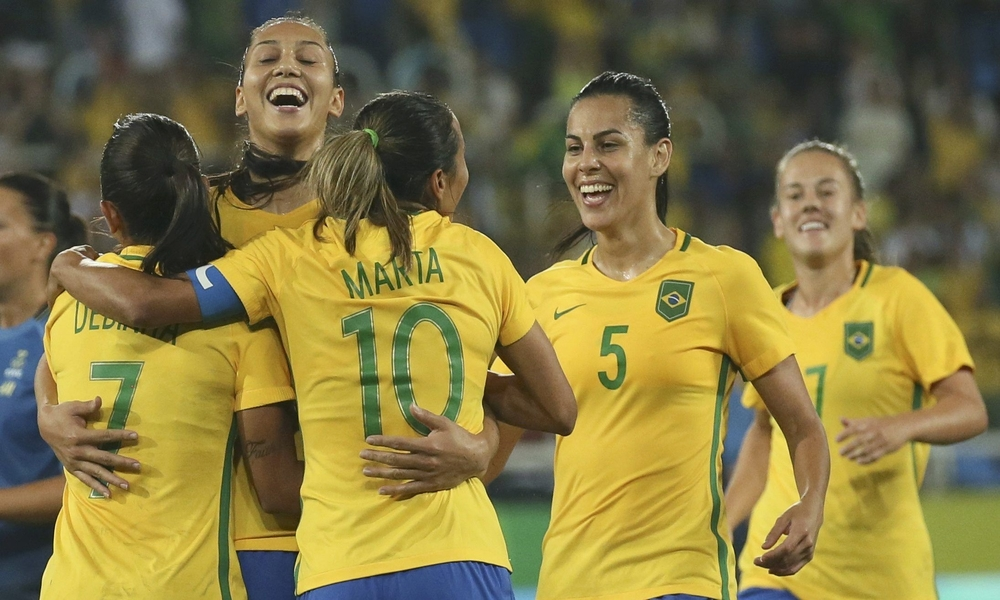

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Football is a global game that connects almost every single person on the planet. No other sport in the history of humankind has beem able to penetrate into countries of varying cultures and continents. Although the TV viewership is much more higher for men's football, the women's football is slowly but steadily catching up to its male counterpart and is slowly starting to grab a lot of global attention.

In this notebook, we will use an up-to-date dataset of over 4,000 women's international football results which includes:
-  date: date of the match
-  home_team: the name of the home team
-  away_team: the name of the away team
-  home_score: full-time home team score including extra time, not including penalty-shootouts
-  away_score: full-time away team score including extra time, not including penalty-shootouts
-  tournament: the name of the tournament
-  city: the name of the city/town/administrative unit where the match was played
-  country: the name of the country where the match was played
-  neutral: TRUE/FALSE column indicating whether the match was played at a neutral venue

Our objective is to analyze this dataset and gain some interesting insights.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/womens-international-football-results/results.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

The data is clean so we do not perform Data Cleaning.

## Feature Engineering

We change the date time format.

In [ ]:
type(df['date'].iloc[0])

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
type(df['date'].iloc[0])

In [ ]:
df['year']=df['date'].apply(lambda x: x.year)

In [ ]:
df.head()

## Exploratory Data Analysis

We want to find the 15 most successful teams that gained the highest scores in their home and the 15 most successful teams that gained the highest scores away from their home.

In [ ]:
home=df.groupby('home_team').sum()['home_score'].sort_values(ascending=False).head(15)

In [ ]:
away=df.groupby('away_team').sum()['away_score'].sort_values(ascending=False).head(15)

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(x=list(home.index), height=list(home.values),color='deepskyblue')
plt.xticks(rotation=90)
plt.xlabel('Country',  fontsize=13)
plt.ylabel('Home Score',  fontsize=13)
plt.title('The Top 15 Teams With The Highest Home Scores', fontsize=16)
plt.subplot(1,2,2)
plt.bar(x=list(away.index), height=list(away.values) ,color='deeppink')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Away Score',  fontsize=13)
plt.title('The Top 15 Teams With The Highest Away Scores', fontsize=16)
plt.show()

We can see that China PR has the highest home scores, and Germany has the highest away scores.

Now we want to find the best 5 teams of all time regarding both the scores obtained in their home and away from their home.

In [ ]:
df_home_away=pd.DataFrame({'total_home_scores':home ,'total_away_scores':away})

In [ ]:
df_home_away.isnull().sum()

In [ ]:
df_home_away.fillna(0, inplace=True)

In [ ]:
df_home_away['total_scores']= df_home_away['total_home_scores'] + df_home_away['total_away_scores']

In [ ]:
df_home_away_sorted=df_home_away.sort_values(by='total_scores', ascending=False).head(5)

In [ ]:
df_home_away_sorted

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x=list(df_home_away_sorted.index), height=df_home_away_sorted['total_scores'],color='slateblue')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Total Score', fontsize=13)
plt.title('The Best 5 Teams Of All Time', fontsize=16)
plt.show()

We can see that Germany is the best team of all time.

We want to find out that in each year, what are the hisgest scores regarding both the scores obtained in  home and away from  home, and which countries obtained these scores in each year.

In [ ]:
country=[]
total_score=[]

for x in df['year'].unique():
    home=df[df['year']==x].groupby('home_team').sum()['home_score']
    away=df[df['year']==x].groupby('away_team').sum()['away_score']
    new=pd.DataFrame({'home_team':home ,'away_team':away})
    new.fillna(0, inplace=True)
    new['total']= new['home_team'] + new['away_team']
    total_sorted=new['total'].sort_values(ascending=False).head(1)
    country=country+list(total_sorted.index)
    total_score=total_score+list(total_sorted)

In [ ]:
df_year= pd.DataFrame({'country':country,'total_score':total_score,'year':df['year'].unique()})

In [ ]:
df_year.head()

In [ ]:
fig=px.scatter_3d(df_year,x='country', y='year',z='total_score')
fig.update_layout(
    title={
        'text': 'Countries That Gained The Highest Total Score In Each Year',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
df_year[df_year['total_score']==df_year['total_score'].max()]

We can see that the maximun total score was 86 and it was obtained by New zaland in 2018.

Let's find the number of tournaments conducted per year.

In [ ]:
number=[]
for x in df['year'].unique():
    number.append(df[df['year']==x]['tournament'].nunique())

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df['year'].unique(), height=number,color='orchid')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Tournaments', fontsize=13)
plt.xticks(ticks=df['year'].unique(),rotation=90)
plt.title('Number of Tournaments Per Year', fontsize=16)
plt.show()

We can see that the maximun number of tournements is 12 and it was obtained in year 2018.

Now we find the most popular Tournaments.

In [ ]:
tournament=[]
for x in df['tournament'].unique():
    tournament.append(df[df['tournament']==x]['year'].nunique())

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df['tournament'].unique(),height=tournament, color='r')
plt.xticks(rotation=90)
plt.title('Number of Tournaments In Total', fontsize=16)
plt.xlabel('Tournaments', fontsize=13)
plt.ylabel('Number', fontsize=13)
plt.show()

We observe that Algarve Cup is most popular and UEFA Euro qualification is the second most-popular tornament.

Let's visualize the distribuition of home scores and away scores.

In [ ]:
plt.figure(figsize=(17,6))


plt.subplot(1,2,1)
sns.distplot(df['home_score'],bins=15,color='lime',hist_kws=dict(edgecolor='black'))
plt.xlabel('Home Score', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Distribuition Of Home Scores', fontsize=16)

plt.subplot(1,2,2)
sns.distplot(df['away_score'],bins=15,color='magenta',hist_kws=dict(edgecolor='black'))
plt.xlabel('Away Score', fontsize=13)
plt.title('Distribuition Of Away Scores', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['home_score'], color='r')
sns.kdeplot(df['away_score'], color='b')
plt.xlabel('Score', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(['Home Score', 'Away Score'], fontsize=12)
plt.title('Comparison Of Home And Away Scores', fontsize=16)
plt.show()

We can see that the away scores starts at much higher value as compared with the home scores.

Let's find the first 15 countries with the highest number of hosting.

In [ ]:
number=[]
for x in df['country'].unique():
    number.append(df[df['country']==x]['year'].nunique())

In [ ]:
df_country=pd.DataFrame({'Host Country':df['country'].unique(),'Number of Hosting':number}).sort_values(by='Number of Hosting',ascending=False).head(15)

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df_country['Host Country'], height=df_country['Number of Hosting'], color='turquoise')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hosting', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 15 Countries With The Highest Number Of Hosting', fontsize=16)
plt.show()

We can see that Portugal hosted the highest number of games.

We find the countries that host the highest number of most matches where they themselves are not participating in.

In [ ]:
only_host=[]
for x in df['country'].unique():
        df_con=df[df['country']==x]
        only_host.append(df_con[(df_con['home_team']!=x) & (df_con['away_team']!=x)]['date'].count())

In [ ]:
df_host=pd.DataFrame({'Host Country':df['country'].unique(), 'Number of Only Hosting':only_host}).sort_values(by='Number of Only Hosting',ascending=False).head(15)

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df_host['Host Country'], height=df_host['Number of Only Hosting'],color='purple')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hosting', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 15 Countries That only Hosted Matches', fontsize=16)
plt.show()

We can see that Portugal hosted the highest number of games in which it did not played.

Let's explore how much, if at all, hosting a major tournament helps a country's chances in the tournament.

In [ ]:
win=[]
lose=[]
equal=[]
for x in df['country'].unique():
    df_con=df[df['country']==x]
    df_home=df_con[df_con['home_team']==x]
    win.append(df_con[df_con['home_score']>df_con['away_score']]['date'].count())
    lose.append(df_con[df_con['home_score']<df_con['away_score']]['date'].count())
    equal.append(df_con[df_con['home_score']==df_con['away_score']]['date'].count())

In [ ]:
df_chance=pd.DataFrame({'Host Country':df['country'].unique(), 'Number of Winning':win, 'Number of Loosing':lose, 'Number of Equal':equal})

In [ ]:
df_merge=pd.merge(df_chance,df_country, on='Host Country').sort_values(by='Number of Hosting', ascending=False)

In [ ]:
df_merge.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df_merge['Host Country'], height=df_merge['Number of Winning'], color='royalblue')
plt.bar(x=df_merge['Host Country'], height=df_merge['Number of Loosing'], color='greenyellow')
plt.legend(['Winning','Loosing'])
plt.xlabel('Host Country', fontsize=13)
plt.ylabel('Number', fontsize=13)
plt.xticks(rotation=90)
plt.legend(['Winning', 'Loosing'], fontsize=12)
plt.title('Number Of Winning And Loosing Of The 15 Top Host Countries', fontsize=16)
plt.show()

We see that except for Finland and Hungary, for other 15 host countries which hosted most of the matches, the number of winning was higher than the number of loosing. So we conclude that hosting can increase the chance of winning.

We create 3D Scatter plots of home teams and away teams versus their home scores and away scores in each year.

In [ ]:
fig=px.scatter_3d(data_frame=df,x='home_score', y='away_score',z='away_team',color='home_team',hover_name='year')
fig.update_layout(
    title={
        'text': 'Home Teams And Away Teams Versus Home Scores And Away Scores In Each Year',
        'y':0.92,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## Conclusion

In this notebook, we analyzed Women's International Football Results Dataset and analyzed:


- The 15 most successful teams that gained the highest home scores and away scores.

- The best 5 teams of all time regarding both home scores and away scores.

- Countries which gained the hisgest total scores in each year.

- The number of tournaments conducted per year.

- The most popular tournaments.

- The distribuition of home scores and away scores.

- The first 15 countries with the highest number of hosting.

- Countries which hosted most of the matches where they themselves did not participate in.

- Whether hosting a major tournament helped a country's chances in the tournament.